In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib notebook

### Reading the Brazilian football dataset.

In [47]:
football_df = pd.read_csv('campeonato-brasileiro-full.csv')
football_df.head(10)

,Horário,Dia,Data,Clube 1,Clube 2,Vencedor,Rodada,Arena,Clube 1 Gols,Clube 2 Gols,Clube 1 Estado,Clube 2 Estado,Estado Clube Vencedor
0,16h00,Sábado,2000-07-29,Fluminense,Bahia,Fluminense,1ª Rodada,Maracanã,2,0,RJ,BA,RJ
1,16h00,Sábado,2000-07-29,Vasco,Sport,Sport,1ª Rodada,São Januário,0,2,RJ,PE,PE
2,16h00,Sábado,2000-07-29,Vitória,Palmeiras,Vitória,1ª Rodada,Barradão,4,1,ES,SP,ES
3,17h00,Domingo,2000-07-30,Botafogo-RJ,Atlético-MG,-,1ª Rodada,Caio Martins,0,0,RJ,MG,Empate
4,18h30,Domingo,2000-07-30,Juventude,Flamengo,-,1ª Rodada,Alfredo Jaconi,1,1,RS,RJ,Empate
5,16h00,Domingo,2000-07-30,Guarani,Santa Cruz,-,1ª Rodada,Brinco de Ouro,0,0,SP,PE,Empate
6,17h00,Domingo,2000-07-30,Cruzeiro,Athlético-PR,Athlético-PR,1ª Rodada,Mineirão,0,2,MG,PR,PR
7,16h00,Domingo,2000-07-30,América-MG,Gama,Gama,1ª Rodada,Independência,0,1,MG,DF,DF
8,18h30,Domingo,2000-07-30,Goiás,Corinthians,Goiás,1ª Rodada,Serra Dourada,3,0,GO,SP,GO
9,20h30,Quarta-feira,2000-08-02,Coritiba,Sport,-,2ª Rodada,Couto Pereira,0,0,PR,PE,Empate


In [48]:
football_df= football_df.rename(columns = {'Horário': 'time', 'Dia': 'week_d','Data': 'date',
                        'Clube 1':'club_1','Clube 2':'club_2','Vencedor':'winner','Rodada': 'round',
                        'Arena':'stadium','Clube 1 Gols':'club_1_goals','Gols Clube 2':'club_2_goals',
                        'Clube 1 Estado':'club_1_state','Clube 2 Estado':'club_2_state',
                        'Estado Clube Vencedor':'winner_state'},inplace = False)
football_df

,time,week_d,date,club_1,club_2,winner,round,stadium,club_1_goals,Clube 2 Gols,club_1_state,club_2_state,winner_state
0,16h00,Sábado,2000-07-29,Fluminense,Bahia,Fluminense,1ª Rodada,Maracanã,2,0,RJ,BA,RJ
1,16h00,Sábado,2000-07-29,Vasco,Sport,Sport,1ª Rodada,São Januário,0,2,RJ,PE,PE
2,16h00,Sábado,2000-07-29,Vitória,Palmeiras,Vitória,1ª Rodada,Barradão,4,1,ES,SP,ES
3,17h00,Domingo,2000-07-30,Botafogo-RJ,Atlético-MG,-,1ª Rodada,Caio Martins,0,0,RJ,MG,Empate
4,18h30,Domingo,2000-07-30,Juventude,Flamengo,-,1ª Rodada,Alfredo Jaconi,1,1,RS,RJ,Empate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7934,17:00,Domingo,2019-12-08,Goiás,Grêmio,Goiás,38ª Rodada,Serra Dourada,3,2,GO,RS,GO
7935,17:00,Domingo,2019-12-08,Internacional,Atlético-MG,Internacional,38ª Rodada,Beira Rio,2,1,RS,MG,RS
7936,17:00,Domingo,2019-12-08,Cruzeiro,Palmeiras,Palmeiras,38ª Rodada,Mineirão,0,2,MG,SP,SP
7937,17:00,Domingo,2019-12-08,Santos,Flamengo,Santos,38ª Rodada,Vila Belmiro,4,0,SP,RJ,SP


In [49]:
football_df['winner'] = football_df['winner'].replace({'-':'draw'})
football_df['round'] = football_df['round'].replace({'Rodada':'round'})
football_df['winner_state'] = football_df['winner_state'].replace({'Empate':'draw'})
football_df['date'] = pd.to_datetime(football_df['date'],format='%Y-%m-%d')
football_df['year'] = football_df['date'].dt.year
football_df.loc[(football_df['year'] == 2001) & (football_df['round'] == 'FINAL')&(football_df['club_1'] == 'VASCO'),
                ['year']] = 2000
football_df[(football_df['year'] == 2000) &(football_df['round'] == 'FINAL')&(football_df['club_1'] == 'VASCO')].head(40)

,time,week_d,date,club_1,club_2,winner,round,stadium,club_1_goals,Clube 2 Gols,club_1_state,club_2_state,winner_state,year
329,16h00,Quinta-feira,2001-01-18,VASCO,São Caetano,VASCO,FINAL,Maracanã,3,1,RJ,SP,RJ,2000


In [50]:
home_df = pd.DataFrame(football_df[(football_df['club_1']==football_df['winner'])].groupby('year')['club_1'].count())
home_df['home'] = home_df['club_1']/football_df.groupby(['year'])['club_1'].count()
home_df.head(10)


,club_1,home
year,,
2000,158,0.478788
2001,193,0.500000
2002,188,0.557864
2003,297,0.538043
2004,288,0.521739
2005,235,0.508658
2006,191,0.502632
2007,194,0.506527
2008,206,0.546419


In [51]:

temp_df = pd.DataFrame(football_df[(football_df['club_2']==football_df['winner'])].groupby(['year'])['club_2'].count())
home_df['visit'] = temp_df['club_2']/football_df.groupby(['year'])['club_1'].count()
home_df['year']=home_df.index
home_df['draw']=1-(home_df['home']+home_df['visit'])
home_df.head(40)

,club_1,home,visit,year,draw
year,,,,,
2000,158,0.478788,0.254545,2000,0.266667
2001,193,0.500000,0.272021,2001,0.227979
2002,188,0.557864,0.240356,2002,0.201780
2003,297,0.538043,0.204710,2003,0.257246
2004,288,0.521739,0.224638,2004,0.253623
2005,235,0.508658,0.268398,2005,0.222944
2006,191,0.502632,0.242105,2006,0.255263
2007,194,0.506527,0.255875,2007,0.237598
2008,206,0.546419,0.201592,2008,0.251989


In [52]:
home_df.dtypes

club_1      int64
home      float64
visit     float64
year        int64
draw      float64
dtype: object

<IPython.core.display.Javascript object>


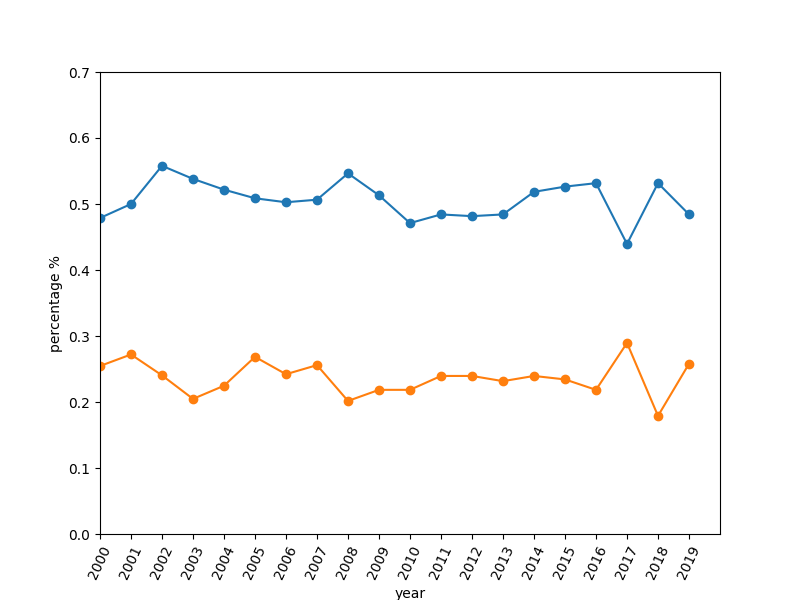

In [85]:
from matplotlib.ticker import MaxNLocator
plt.figure(figsize=(8,6))
plt.plot([22,44,55], '--r')
plt.xticks(np.arange(min(home_df['year']), max(home_df['year'])+1, 1.0));
plt.xlabel('year')
plt.ylabel('percentage %')

axes = plt.gca()
axes.set_xlim([2000,2020])
axes.set_ylim([0,0.7])
x = plt.gca().xaxis
# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(65)
